<a href="https://colab.research.google.com/github/ProjectProRepo/How-to-Build-an-AI-Model-from-Scratch-/blob/main/AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch

In [3]:
data = pd.read_csv('Position_Salaries.csv')

In [4]:
data= data.apply(pd.to_numeric, errors= 'coerce')

In [5]:
data

Position  Level  Salary
0       NaN      1   45000
1       NaN      2   50000
2       NaN      3   60000
3       NaN      4   80000
4       NaN      5  110000
5       NaN      6  150000
6       NaN      7  200000
7       NaN      8  220000
8       NaN      9  250000

In [6]:
x = torch.Tensor(data.values[:,1]).unsqueeze(dim=1)
y = torch.Tensor(data.values[:,2]).unsqueeze(dim=1)

In [7]:
x,y

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[ 45000.],
         [ 50000.],
         [ 60000.],
         [ 80000.],
         [110000.],
         [150000.],
         [200000.],
         [220000.],
         [250000.]]))

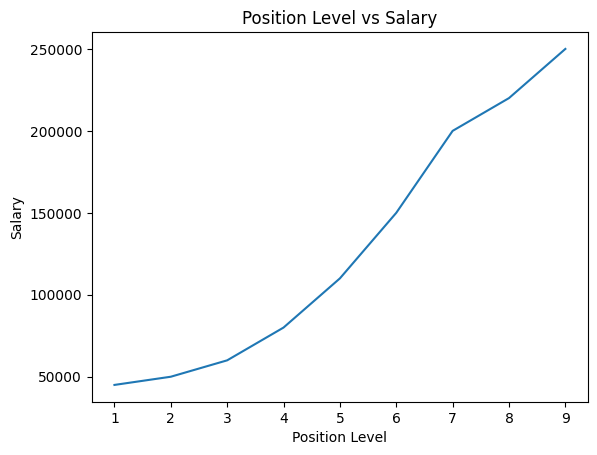

In [17]:
import matplotlib.pyplot as plt


# Plot Position Level vs. Salary
plt.plot(x, y)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Position Level vs Salary')
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = torch.Tensor(scaler_x.fit_transform(x))
y_scaled = torch.Tensor(scaler_y.fit_transform(y))

# Then split and train using x_scaled, y_scaled


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)


# Print the lengths of the splits
len(x_train), len(x_test), len(y_train), len(y_test)


(7, 2, 7, 2)

In [26]:
from torch import nn

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)


# Print the model to inspect it
model


Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

In [27]:
# Define the loss function and optimizer
#loss_fn = nn.L1Loss()  # Mean Absolute Error
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the number of epochs
epochs = 100


In [28]:
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test the model's performance on the test set every 10 epochs
    model.eval()
    with torch.inference_mode():
        y_pred = model(x_test)
        test_loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test loss: {test_loss.item()}")


Epoch: 0 | Loss: 1.056609869003296 | Test loss: 0.15866413712501526
Epoch: 10 | Loss: 0.06399242579936981 | Test loss: 0.025256091728806496
Epoch: 20 | Loss: 0.011078949086368084 | Test loss: 0.009464483708143234
Epoch: 30 | Loss: 0.00304891774430871 | Test loss: 0.00992275308817625
Epoch: 40 | Loss: 0.003923855256289244 | Test loss: 0.007099825423210859
Epoch: 50 | Loss: 0.0010563669493421912 | Test loss: 0.02192022278904915
Epoch: 60 | Loss: 0.0008103834697976708 | Test loss: 0.031120505183935165
Epoch: 70 | Loss: 0.00043306738371029496 | Test loss: 0.030923299491405487
Epoch: 80 | Loss: 0.00040102258208207786 | Test loss: 0.030145257711410522
Epoch: 90 | Loss: 0.0002988687192555517 | Test loss: 0.02880227379500866


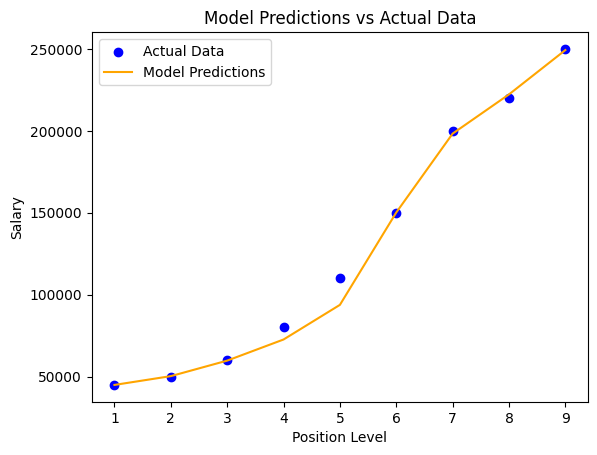

In [30]:
model.eval()
with torch.inference_mode():
    y_preds_scaled = model(x_scaled)
    y_preds = torch.Tensor(scaler_y.inverse_transform(y_preds_scaled.numpy()))

plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_preds, label='Model Predictions', color='orange')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.show()
